# Tube Twin: Passenger count forecasting/general tube analysis 

© Explore Data Science Academy

## Introduction 

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="../Assets/LU_Baker-street.jpg" 
     alt="London Underground"
     style="float: center; padding-bottom=0.5em"
     width=100%/>
     <p><em>Figure 1. The London Tube</em></p> 
</div>

**Client**: Transport for London (TfL) 

Transport for London runs the London Underground (aka “The Tube”), which is a network of train stations which connects the city of London.

**Team**: 

This is Team 6. A combination of data scientists and data engineers that have been assigned the Tube Twin project and this is a notebook for executing various aspect of the project workflow. 

## Context

This project's objective is to create a digital twin of the london tube that can be used for passenger count and traffic analyses/forecasting.


## Basic initialisation
To get started, let's import some basic Python libraries as well as Spark modules and functions.

In [3]:
import findspark
findspark.init()
findspark.find()

import glob 
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt 

from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import *  
from graphframes import * 


> ℹ️ **Objective** ℹ️
>
>Initialise a new **Spark Context** and **Session**.

In [4]:
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

## Reading CSV file and working with Spark

We will now begin to use Spark to analyze and check the data further. 

> ℹ️ **Objective** ℹ️
>
>Re-read the merged CSV data into the notebook. Spark will read all data as strings, so we will be required to convert to the appropriate data types at a later stage. 

In [5]:
station_df = spark.read.csv("../Data/nodes_stations_info.csv", header=True) 
loading_df = spark.read.csv("../Data/lu_train_loading_data.csv", header=True) 

print(f'station_df has {station_df.count()} rows and {len(station_df.columns)} columns') 
print(f'load_df has {loading_df.count()} rows and {len(loading_df.columns)} columns') 

station_df has 1460 rows and 19 columns
load_df has 748 rows and 8 columns


In [103]:
station_df.describe().toPandas()

,summary,node,nlc,naptan,node_type,station,farezones,wifi,bluebadgecarparking,taxiranksoutsidestation,areaname,areaid,level,latitude,longitude,station_entrance_exit,line,line_direction,platform_type,platform_direction
0,count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,104,867,869,869,869
1,mean,5941.393150684931,642.3746575342466,None,None,None,2.864310148232611,None,None,None,None,4.309109518935517,-0.0020470829068577278,51.53808991811677,-0.16729481064483115,None,None,None,None,None
2,stddev,2979.5828457065472,84.7778537362122,None,None,None,1.700407185871135,None,None,None,None,2.0164916694477886,0.15012257912964042,0.05021503968174514,0.13950714887225352,None,None,None,None,None
3,min,1,500,940GZZLUACT,Entrance,"""""""Heathrow Terminals 1","2 & 3""""""",#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,Bakerloo,EB,DLR Only,EB
4,max,99,884,940GZZLUWYP,Platform,Woodside Park,9,TRUE,TRUE,TRUE,BookH,9,1,51.7055,0.23587,Western Ticket Hall,Waterloo & City,WB,WB,WB


In [104]:
loading_df.describe().toPandas()

,summary,from_naptan,to_naptan,from_station,to_station,line,direction,line_direction,platform_direction
0,count,748,748,748,748,748,748,748,747
1,mean,None,None,None,None,2.0,None,None,None
2,stddev,None,None,None,None,0.0,None,None,None
3,min,940GZZLUACT,940GZZLUACT,Acton Town,"""""""Heathrow Terminals 1",2,"3""""""",EB,EB
4,max,940GZZLUWYP,940GZZLUWYP,Woodside Park,Woodside Park,Waterloo & City,Outbound,WB,WB


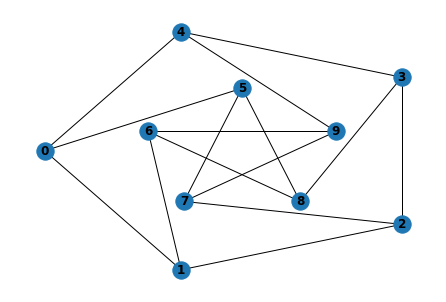

In [ ]:
G = nx.petersen_graph() 
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold') 

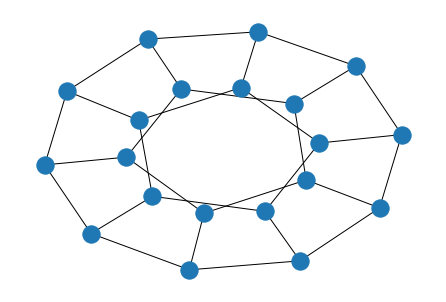

In [ ]:
G = nx.dodecahedral_graph()
nx.draw(G, pos=nx.spring_layout(G)) 

In [ ]:


nodes = station_df.limit(50).select('naptan', 'station').distinct().orderBy('station').toPandas()

nodes.head(10) 

In [26]:
edges = loading_df.limit(50).select('from_station', 'to_station').distinct().toPandas() 

edges.head(10) 

,from_station,to_station
0,"Heathrow Terminals 1,2,3",Heathrow Terminal 5
1,"Heathrow Terminals 1,2,3",Hatton Cross
2,Acton Town,South Ealing
3,Acton Town,Ealing Common
4,Acton Town,Turnham Green
5,Acton Town,Chiswick Park
6,Aldgate,Liverpool Street
7,Aldgate,Tower Hill
8,Aldgate East,Tower Hill
9,Aldgate East,Whitechapel


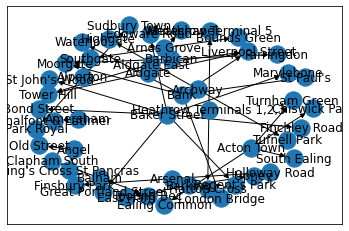

In [68]:
#G = nx.Graph() 

#G.add_nodes_from(nodes.station) 

result = nx.from_pandas_edgelist(edges, source = "from_station", target = "to_station", create_using=nx.DiGraph()) 
nx.draw_networkx(result, pos=nx.spring_layout(result))  

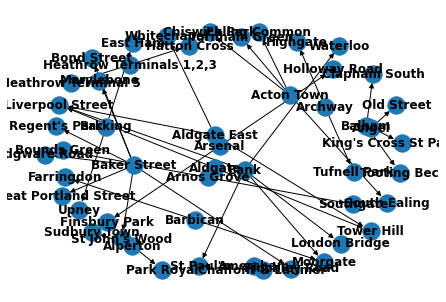

In [71]:
# G = nx.petersen_graph() 
#subax1 = plt.subplot(121)
nx.draw(result, with_labels=True, font_weight='bold') 

#limits = plt.axis("off") 
#nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold') 

#nx.draw(G) 

In [40]:
verts = station_df.limit(50).select('naptan', 'station').distinct().orderBy('station') 

verts.show(10) 

+-----------+------------+
|     naptan|     station|
+-----------+------------+
|940GZZLUACT|  Acton Town|
|940GZZLUALD|     Aldgate|
|940GZZLUADE|Aldgate East|
|940GZZLUALP|    Alperton|
|940GZZLUAMS|    Amersham|
|940GZZLUAGL|       Angel|
|940GZZLUACY|     Archway|
|940GZZLUASG| Arnos Grove|
|940GZZLUASL|     Arsenal|
|940GZZLUBST|Baker Street|
+-----------+------------+



In [44]:
eds = loading_df.limit(50).select('from_naptan', 'to_naptan').distinct() 

eds.show(10) 

+-----------+-----------+
|from_naptan|  to_naptan|
+-----------+-----------+
|940GZZLUHRC|940GZZLUHR5|
|940GZZLUHRC|940GZZLUHNX|
|940GZZLUACT|940GZZLUSEA|
|940GZZLUACT|940GZZLUECM|
|940GZZLUACT|940GZZLUTNG|
|940GZZLUACT|940GZZLUCWP|
|940GZZLUALD|940GZZLULVT|
|940GZZLUALD|940GZZLUTWH|
|940GZZLUADE|940GZZLUTWH|
|940GZZLUADE|940GZZLUWPL|
+-----------+-----------+
only showing top 10 rows



In [46]:
import os 
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages graphframes:graphframes:0.6.0-spark3.3-s_2.12 pyspark-shell' 

In [47]:
graph = GraphFrame(verts, eds) 

# groups = graph.labelPropagation(maxIter=5)
# groups.persist().show(10) 

C:\Spark\spark-3.3.0-bin-hadoop3\python\pyspark\sql\dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


Py4JJavaError: An error occurred while calling o193.loadClass.
: java.lang.ClassNotFoundException: org.graphframes.GraphFramePythonAPI
	at java.base/java.net.URLClassLoader.findClass(URLClassLoader.java:445)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:588)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:521)
	at java.base/jdk.internal.reflect.DirectMethodHandleAccessor.invoke(DirectMethodHandleAccessor.java:104)
	at java.base/java.lang.reflect.Method.invoke(Method.java:577)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)


In [ ]:
g = nx.Graph() 

